Problem 1

In [1]:
import numpy as np

beta=0.442
delta=0.6415
sigma=3
A=1
alpha=0.35
nvec=np.array([1,1,0.2])


def get_K(bvec):
    K = np.sum(bvec)
    return K

def get_L(nvec):
    L = np.sum(nvec)
    return L

def get_w(alpha, A, K, L):
    w= (1- alpha)*A*(K/L)**alpha
    return w

def get_r(alpha, A, K, L, delta):
    r = (alpha*A*(L/K)**(1-alpha))-delta
    return r

def get_c(nvec, bvec, alpha,A, delta):
    K = get_K(bvec)
    L = get_L(nvec)
    r = get_r(alpha,A,K,L, delta)
    w = get_w(alpha,A,K,L)
    bvec_t=np.append(0,bvec)
    bvec_tp1=np.append(bvec,0)
    c= nvec*w + (1+r)*bvec_t - bvec_tp1
    return c

def MU_c(c, sigma):
    MU= c**(-sigma)
    return MU

def feasible(f_params, bvec_guess):
    K = get_K(bvec_guess)
    cvec = get_c(nvec, bvec_guess, alpha, A, delta)
    K_constr = K <= 0 
    c_constr = cvec <= 0
    b_constr = np.zeros(2, dtype=bool)
    if c_constr[0]==True:
        b_constr[0]=True
    elif c_constr[1]==True:
        b_constr[0]=True
        b_constr[1]=True
    elif c_constr[2]==True:
        b_constr[2]=True
    return b_constr, c_constr, K_constr


f_params=(nvec, A, alpha, delta)
bvec_guess = np.array([0.1,0.1])

print('The b_const, c_constr, K_constr for bvec_guess=[1.0, 1.2] are:',  feasible(f_params,np.array([1.0,1.2])))    
print('The b_const, c_constr, K_constr for bvec_guess=[0.06, -0.001] are: ', feasible(f_params,np.array([0.06, -0.001])))
print('The b_const, c_constr, K_constr for bvec_guess=[0.1, 0.1] are: ', feasible(f_params,np.array([0.1, 0.1])))

The b_const, c_constr, K_constr for bvec_guess=[1.0, 1.2] are: (array([ True, False]), array([ True, False, False]), False)
The b_const, c_constr, K_constr for bvec_guess=[0.06, -0.001] are:  (array([False, False]), array([False, False, False]), False)
The b_const, c_constr, K_constr for bvec_guess=[0.1, 0.1] are:  (array([False, False]), array([False, False, False]), False)


Problem 2

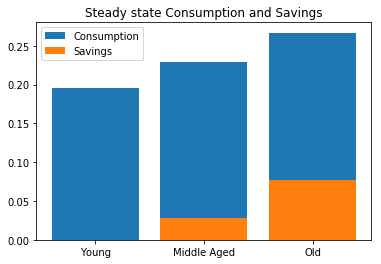

{'b_ss': array([0.02817692, 0.07686545]), 'c_ss': array([0.19597528, 0.22861594, 0.26669307]), 'w_ss': 0.22415219593446262, 'r_ss': 1.8863765057190751, 'K_ss': 0.10504237022597476, 'Y_ss': 0.7586689708551043, 'C_ss': 0.6912842903551415, 'EulErr_ss': array([-2.84217094e-14,  2.84217094e-14]), 'RCerr_ss': 1.3877787807814457e-17, 'ss_time': 0.0038248999999268563}


In [13]:
import scipy.optimize as opt
import numpy as np
from matplotlib import pyplot as plt
import time

beta=0.55
delta=0.6415
sigma=3
A=1
alpha=0.35
nvec=np.array([1,1,0.2])
SS_tol=1e-14


def get_K(bvec):
    K = np.sum(bvec)
    return K

def get_L(nvec):
    L = np.sum(nvec)
    return L

def get_w(alpha, A, K, L):
    w= (1- alpha)*A*(K/L)**alpha
    return w

def get_r(alpha, A, K, L, delta):
    r = (alpha*A*(L/K)**(1-alpha))-delta
    return r

def get_c(nvec, bvec, alpha,A, delta):
    K = get_K(bvec)
    L = get_L(nvec)
    r = get_r(alpha,A,K,L, delta)
    w = get_w(alpha,A,K,L)
    bvec_t=np.append(0,bvec)
    bvec_tp1=np.append(bvec,0)
    c= nvec*w + (1+r)*bvec_t - bvec_tp1
    return c

def MU_c(c, sigma):
    MU= c**(-sigma)
    return MU

def euler_errors(bvec, alpha,A,beta, nvec, delta, sigma):
    K = get_K(bvec)
    L = get_L(nvec)
    r = get_r(alpha, A, K,L,delta)
    cvec = get_c(nvec, bvec, alpha,A, delta)
    u_prime = MU_c(cvec, sigma)
    r = get_r(alpha,A,K,L,delta)
    errors = u_prime[:-1] - beta*(1+r)*u_prime[1:]
    return errors

def get_ss(params, bvec_guess, SS_graphs):
    start_time= time.clock()
    euler_args = (alpha,A,beta,nvec, delta, sigma)
    results = opt.root(euler_errors, bvec_guess, args=euler_args, tol=SS_tol)
    b_ss = results.x
    EulErr_ss = results.fun
    c_ss = get_c(nvec, b_ss,alpha,A,delta)
    K_ss = get_K(b_ss)
    L_ss = get_L(nvec)
    w_ss = get_w(alpha, A, K_ss, L_ss)
    r_ss = get_r(alpha, A, K_ss, L_ss, delta)
    Y_ss = A*((K_ss)**alpha)*(L_ss**(1-alpha))
    C_ss = np.sum(c_ss)
    f_params = (nvec,A,alpha,delta)
    res_constraint = feasible(f_params,b_ss)
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    ss_time = time.clock() - start_time
    if SS_graphs==True:
        plt.bar(['Young', 'Middle Aged', 'Old'], c_ss, label='Consumption')
        plt.bar(['Middle Aged', 'Old'], b_ss, label='Savings')
        plt.legend(loc = 'upper left')
        plt.title('Steady state Consumption and Savings')
        plt.show()    
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 'K_ss': K_ss,
                 'Y_ss':Y_ss, 'C_ss':C_ss, 'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                'ss_time': ss_time}
    return ss_output

params=((beta, sigma, nvec, A, alpha, delta, SS_tol))
bvec_guess = np.array([0.1,0.1])
SS_graphs = False
ss_output= get_ss(params, bvec_guess, True)
print(ss_output)

Higher $\beta$ implies higher tendency to delay gratification and higher saving rates. Higher savings corresponding to higher  $\beta$ wrt to lower savings corresponding to lower $\beta$ implies lower interest rate as increase in supply of savings should lead to lowering of the price,r,  paid to the savers.

Higher savings  imply higher capital stock in the economy. Since labour and capital stock are complements, this implies  wages will correspondingly increase.

Despite the substitution effect leading to lower consumption, the income effect due to higher wages leads to overall increase in consumption. Consumption in each period of life is higher when $\beta$ is higher, may be because of consumption smoothing . 

Problem 3

Maximum Euler Error =  3.75401128849262e-07


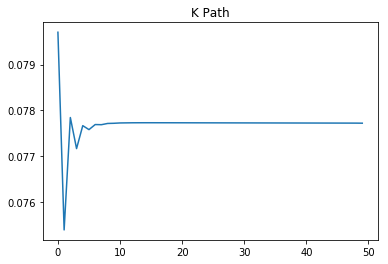

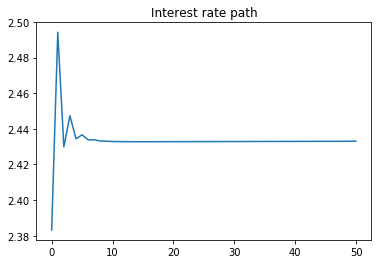

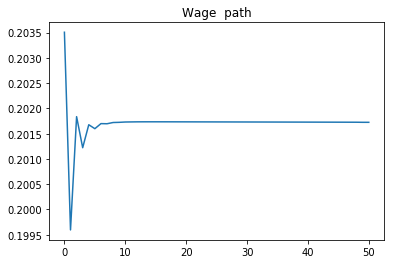

In [22]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from itertools import chain

beta=0.442
delta=0.6415
sigma=3
A=1
alpha=0.35
nvec=np.array([1,1,0.2])
SS_tol=1e-14
T=50
iter_max=100 
xi = 0.5

def get_K(bvec):
    K = bvec.sum()
    return K


def get_L(nvec):
    L = nvec.sum()
    return L


def get_r(nvec, bvec, A, alpha, delta):
    K = get_K(bvec)
    L = get_L(nvec)
    r = alpha * A * (L / K) ** (1 - alpha) - delta
    return r


def get_w(nvec, bvec, A, alpha):
    K = get_K(bvec)
    L = get_L(nvec)
    w = (1 - alpha) * A * (K / L) ** alpha
    return w


def get_c(nvec, bvec, r, w):
    b_s = np.append(0.0, bvec)
    b_splus1 = np.append(bvec, 0.0)
    cvec = (1 + r) * b_s + w * nvec - b_splus1
    return cvec


def u_prime(cvec, sigma):
    MUc = cvec ** -sigma
    return MUc


def euler_system(bvec, *args):
    (nvec, beta, sigma, A, alpha, delta) = args
    r = get_r(nvec, bvec, A, alpha, delta)
    w = get_w(nvec, bvec, A, alpha)
    cvec = get_c(nvec, bvec, r, w)
    euler_errors = (u_prime(cvec[:2], sigma) - beta * (1+r) *
                    u_prime(cvec[1:], sigma))
    return euler_errors


def lone_euler(b32, *args):
    (r1, r2, w1, w2, nvec, b21, beta, sigma) = args
    c21 = (1 + r1) * b21 + w1 * nvec[1] - b32
    c32 = (1 + r2) * b32 + w2 * nvec[2]
    euler_error = (u_prime(c21, sigma) - beta * (1 + r2) *
                   u_prime(c32, sigma))
    return euler_error


def euler_sys_tpi(guesses, *args):
    b2, b3 = guesses
    (r_tp1, r_tp2, w_t, w_tp1, w_tp2, nvec, beta, sigma) = args
    c1 = w_t * nvec[0] - b2
    c2 = (1 + r_tp1) * b2 + w_tp1 * nvec[1] - b3
    c3 = (1 + r_tp2) * b3 + w_tp2 * nvec[2]
    euler_error1 = (u_prime(c1, sigma) - beta * (1 + r_tp1) *
                    u_prime(c2, sigma))
    euler_error2 = (u_prime(c2, sigma) - beta * (1 + r_tp2) *
                    u_prime(c3, sigma))
    euler_errors = [euler_error1, euler_error2]
    return euler_errors


def get_r_path(L, K, A, alpha, delta):
    rpath = alpha * A * (L / K) ** (1 - alpha) - delta
    return rpath


def get_w_path(L, K, A, alpha):
    wpath = (1 - alpha) * A * (K / L) ** alpha
    return wpath

bvec_init = np.array([0.02, 0.07])
eul_args = (nvec, beta, sigma, A, alpha, delta)
results = opt.root(euler_system, bvec_init, args=(eul_args), tol=1e-14)
b_ss = results.x
zero_val = results.fun
r_ss = get_r(nvec, b_ss, A, alpha, delta)
w_ss = get_w(nvec, b_ss, A, alpha)
K_ss = get_K(b_ss)
L_ss = get_L(nvec)

bvec1 = np.array([0.8 * b_ss[0], 1.1 * b_ss[1]])
T = 50
xi = 0.2
K1 = get_K(bvec1)
Kpath = np.linspace(K1, K_ss, num=T)

dist = 10
tpi_iter = 0
tpi_max_iter = 100
tpi_tol = 1e-9
error_euler=[]
while (dist > tpi_tol) & (tpi_iter < tpi_max_iter):
    tpi_iter += 1
    L = get_L(nvec)
    rpath = get_r_path(L, Kpath, A, alpha, delta)
    rpath = np.append(rpath, r_ss)
    wpath = get_w_path(L, Kpath, A, alpha)
    wpath = np.append(wpath, w_ss)
    b32_guess = bvec1[1]
    b32_args = (rpath[0], rpath[1], wpath[0], wpath[1], nvec, bvec1[0],
                beta, sigma)
    results = opt.root(lone_euler, b32_guess, args=(b32_args))
    b32 = results.x
    error_euler.append(results.fun.tolist())
    

    bmat = np.zeros((T + 1, 2))
    bmat[0, :] = bvec1
    bmat[1, 1] = b32
    for t in range(1, T):
        bguess = [bmat[t-1, 0], bmat[t, 1]]
        b_args = (rpath[t], rpath[t+1], wpath[t-1], wpath[t],
                  wpath[t], nvec, beta, sigma)
        results = opt.root(euler_sys_tpi, bguess, args=(b_args))
        b2, b3 = results.x
        error_euler.append(results.fun.tolist())
        bmat[t, 0] = b2
        bmat[t+1, 1] = b3

    Kprime = bmat.sum(axis=1)
    dist = ((Kpath[:-1] - Kprime[:-2]) ** 2).sum()
    Kpath = xi * Kprime[:-2] + (1 - xi) * Kpath[:-1]
    Kpath = np.append(Kpath, K_ss)

print('Maximum Euler Error = ', max(np.abs(np.array(list(chain(*error_euler))))))

    
plt.plot(Kpath)
plt.title('K Path')
plt.show()

plt.plot(rpath)
plt.title('Interest rate path')
plt.show()

plt.plot(wpath)
plt.title('Wage  path')
plt.show()